# Деревья принятия решений

![Деревья принятия решений в задачах регрессии](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_0011.png "Деревья принятия решений в задачах регрессии")

Деревья Прияния Решений (англ. Decision Trees) - это метод *непарамтрического* машинного обучения, оснванный на разбиении решения задачи **классификации** или **регрессии** на конечное число составных *простых* подзадач.

Преимущества деревьев решений:

* Просто понять и интерпретировать. Деревья можно визуализировать.
* Требует небольшой подготовки данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. Обратите внимание, однако, что этот модуль не поддерживает пропущенные значения.
* Стоимость использования дерева (т. е. прогнозирования данных) логарифмична по количеству точек данных, используемых для обучения дерева.
* Способно отрегулировать и численные и категориальные данные. Другие методы обычно специализируются на анализе наборов данных, которые имеют только один тип переменных.
* Способно к решению проблем с множеством выходов.
* Использует модель белого ящика. Если данная ситуация наблюдаема в модели, то объяснение условия легко объясняется булевой логикой. Напротив, в модели черного ящика (например, в искусственной нейронной сети) результаты могут быть более трудными для интерпретации.
* Возможность проверки модели с помощью статистических тестов. Это дает возможность учесть надежность модели.
* Работает хорошо, даже если его предположения несколько нарушены истинной моделью, из которой были созданы данные.

К недостаткам деревьев решений относятся:

* Иногда алгоритмы обучения могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучение. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка (в настоящее время не поддерживается в sklearn), установка минимального количества образцов, требуемых в листовом узле, или установка максимальной глубины дерева.
* Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема устраняется с помощью деревьев решений в ансамбле.
* Проблема обучения оптимального дерева решений является NP-полной задачей при некоторых аспектах оптимальности даже для простых понятий. Следовательно, практические алгоритмы обучения дерева решений основаны на эвристических алгоритмах, таких как жадный алгоритм, где локально оптимальные решения принимаются на каждом узле. Такие алгоритмы не могут гарантировать возврат глобально оптимального дерева решений. Это может быть смягчено путем обучения нескольких деревьев в ансамбле learner, где функции и выборки случайным образом отбираются с заменой.
* Есть понятия, которые трудно изучить, потому что деревья решений не выражают их легко, такие как проблемы XOR, четности или мультиплексора.
* Исследователь может создать *предвзятые деревья*, если доминируют некоторые классы. Поэтому рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

![Пример дерева (классификация)](https://scikit-learn.org/stable/_images/iris.png "Пример дерева (классификация)")

[Википедия 1](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9)

[Википедия 2](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9)

[Документация](https://scikit-learn.org/stable/modules/tree.html)

## Пример 1: Один выход

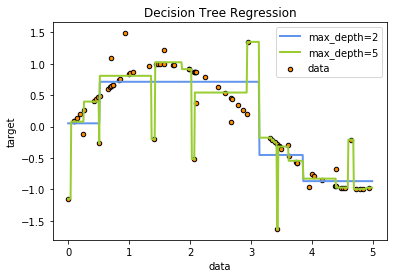

In [2]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Пример 2: Много выходов

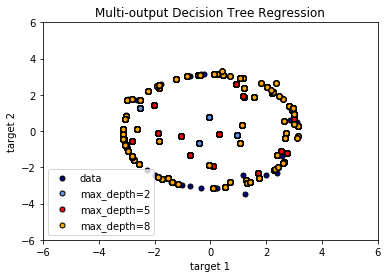

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()